In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
np.random.seed(42) 

In [3]:
# from sklearn.datasets import load_iris
# iris = load_iris()
# data = pd.DataFrame(iris.data, columns=iris.feature_names)
# data['species'] = iris.target
# data.head()

In [4]:
# X = iris.data
# y = iris.target

# # data splitting
# X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2,random_state=42)

In [5]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)  
# X_test  = scaler.transform(X_test)      

In [6]:
# # number of classes (iris has 3 species: 0,1,2)
# output_size = len(np.unique(y_train))
# # X has shape (num_samples, num_features)
# num_samples, num_features = X_train.shape
# input_size = num_features

In [7]:
# # one-hot in data processing
# y_train_oh = np.eye(output_size)[y_train]
# y_test_oh  = np.eye(output_size)[y_test]

In [8]:
# load dataset
df = pd.read_csv("heart_disease_uci.csv")
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [9]:
df.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [10]:
# distribution of Target Values in Dataset
df.num.value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [11]:
# binary classification
# num > 0 => disease(1), else 0
y = (df["num"].astype(int) > 0).astype(int).values
X_df = df.drop(columns=["num", "id"]).copy()

In [12]:
# convert categorical columns to one-hot
cat_cols = X_df.select_dtypes(include=["object"]).columns.tolist()
if len(cat_cols) > 0:
    X_df = pd.get_dummies(X_df, columns=cat_cols, drop_first=False)
X_df.head()

,age,trestbps,chol,thalch,oldpeak,ca,sex_Female,sex_Male,dataset_Cleveland,dataset_Hungary,...,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145.0,233.0,150.0,2.3,0.0,False,True,True,False,...,False,False,True,False,True,False,False,True,False,False
1,67,160.0,286.0,108.0,1.5,3.0,False,True,True,False,...,False,False,False,True,False,True,False,False,True,False
2,67,120.0,229.0,129.0,2.6,2.0,False,True,True,False,...,False,False,False,True,False,True,False,False,False,True
3,37,130.0,250.0,187.0,3.5,0.0,False,True,True,False,...,True,False,True,False,True,False,False,False,True,False
4,41,130.0,204.0,172.0,1.4,0.0,True,False,True,False,...,False,False,True,False,False,False,True,False,True,False


In [13]:
# data split (stratify=y, mantain the categorical proportion in both training and test dataset)
X_train_df, X_test_df, y_train, y_test = train_test_split(
    X_df, y, test_size=0.2, random_state=42, stratify=y
)

In [14]:
# Align dummy columns between train and test (fill missing with 0)
X_test_df = X_test_df.reindex(columns=X_train_df.columns, fill_value=0)

In [15]:
# Convert pandas DataFrame to NumPy 
X_train = X_train_df.values.astype(float)
X_test  = X_test_df.values.astype(float)

In [16]:
# impute
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test  = imputer.transform(X_test)

In [17]:
# scale (fit on train)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [18]:
# network sizes
input_size  = X_train.shape[1]
output_size = len(np.unique(y_train))

In [19]:
# one-hot labels
y_train_oh = np.eye(output_size)[y_train]
y_test_oh  = np.eye(output_size)[y_test]

In [20]:
# sanity check
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("input_size:", input_size, "output_size:", output_size)
print("Class balance:", np.bincount(y_train), np.bincount(y_test))
print("NaN:", np.isnan(X_train).sum(), np.isnan(X_test).sum())

X_train: (736, 29) X_test: (184, 29)
input_size: 29 output_size: 2
Class balance: [329 407] [ 82 102]
NaN: 0 0


In [21]:
# Activation functions
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)
    
def sigmoid(x): 
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)
    
def softmax(z):
    # stability trick
    z = z - np.max(z, axis=1, keepdims=True)
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [22]:
class NeuralNet:
  
    def __init__(self, sizes, learning_rate=0.01, keep_prob=1.0, l2_lambda=0.0):
        
        self.lr = learning_rate
        self.keep_prob = keep_prob
        self.l2_lambda = l2_lambda
        
        self.W = []
        self.b = []

        # # Simple random initialization 
        # for i in range(len(sizes) - 1):
        #     self.W.append(np.random.randn(sizes[i], sizes[i+1]) * 0.01)
        #     self.b.append(np.zeros((1, sizes[i+1])))


        # He initialization for ReLU
        for i in range(len(sizes) - 1):
            fan_in = sizes[i]
            self.W.append(np.random.randn(sizes[i], sizes[i+1]) * np.sqrt(2.0 / fan_in))
            self.b.append(np.zeros((1, sizes[i+1])))

            
    
    # Forward pass
    def forward(self, X, training=True):
        
        A = X
        
        # store (A_prev, Z, A, mask) for each layer
        self.cache = []
        self.training = training 

        for i in range(len(self.W)):

            A_prev = A
            Z = A_prev @ self.W[i] + self.b[i]

            # hidden layers: ReLU
            if i < len(self.W) - 1:
                A = relu(Z)


                # inverted dropout (training only)
                if training and self.keep_prob < 1.0:                       
                    mask = (np.random.rand(*A.shape) < self.keep_prob).astype(float) 
                    # scale activation
                    A = (A * mask) / self.keep_prob                        
                else:
                    mask = None 
                    

                
            # last layer: Softmax
            else:
                A = softmax(Z)
                # output layer has no dropout
                mask = None   

            self.cache.append((A_prev, Z, A, mask)) 

        return A

        
    # Loss function
    def compute_loss(self, y_pred, y_true, include_l2=True):
    
        # number of samples
        m = y_true.shape[0]

        # add small epsilon to avoid log(0)
        eps = 1e-12
        base_loss = -np.sum(y_true * np.log(y_pred + eps)) / m

        
        if not include_l2:
            return base_loss


        # L2 regularization (weight decay): penalize large weights
        l2_loss = 0.0
        for W in self.W:
            l2_loss += np.sum(W * W)
        l2_loss = (self.l2_lambda / (2 * m)) * l2_loss

        
        return base_loss + l2_loss
        
        
    # Backward pass
    def backward(self, y_true):

        # number of samples
        m = y_true.shape[0]

        # last layer index
        L = len(self.W) - 1  

        # Output layer gradient
        _, _, AL, _ = self.cache[L]

        dZ = (AL - y_true) / m

        for i in reversed(range(len(self.W))):

            # get cache for layer i
            A_prev, _, _, _ = self.cache[i]

            # L2 regularization gradient (weight decay)
            l2_grad = (self.l2_lambda / m) * self.W[i]
            
            # compute gradients dW, db
            dW = A_prev.T @ dZ

            dW += l2_grad
            
            db = np.sum(dZ, axis=0, keepdims=True)
            
            # propagate to previous layer (if not input layer)
            if i > 0:

                # Z_prev for ReLU derivative, mask_prev for dropout backward
                _, Z_prev, _, mask_prev = self.cache[i-1]
                
                dZ_prev = dZ @ self.W[i].T 

                # inverted dropout backward (training only)
                if mask_prev is not None:   
                    # scale gradient
                    dZ_prev = (dZ_prev * mask_prev) / self.keep_prob

                # ReLU backprop
                dZ_prev = dZ_prev * relu_derivative(Z_prev) 
                
                # update dZ
                dZ = dZ_prev
            
            # parameter update for layer i
            self.W[i] -= self.lr * dW
            self.b[i] -= self.lr * db

    
    # Prediction
    def predict(self, X):
        probs = self.forward(X, training=False) 
        return np.argmax(probs, axis=1)

In [23]:
# hyperparameter setting
hidden_sizes = [32]
learning_rate = 0.01
num_epochs = 2000
keep_prob = 0.9
l2_lambda = 0.01


# define architecture by a list
sizes = [input_size] + hidden_sizes + [output_size]
# initialize neural network
nn = NeuralNet(sizes=sizes, learning_rate=learning_rate, keep_prob=keep_prob, l2_lambda=l2_lambda)



# record history
log_records = []



for epoch in range(num_epochs):

    # ===== Training step (with dropout) =====
    
    train_probs_trainmode = nn.forward(X_train, training=True) 

    # train loss
    train_base_loss = nn.compute_loss(train_probs_trainmode, y_train_oh, include_l2=False)
    train_total_loss = nn.compute_loss(train_probs_trainmode, y_train_oh, include_l2=True)
    
    # update parameters
    nn.backward(y_train_oh)


    # ===== Evaluation step (no dropout) =====
    if (epoch + 1) % 100 == 0:


        # forward without dropout
        train_probs_evalmode = nn.forward(X_train, training=False)
        test_probs_evalmode  = nn.forward(X_test,  training=False)

        # accuracy comparison
        train_acc = np.mean(np.argmax(train_probs_evalmode, axis=1) == y_train)
        test_acc  = np.mean(np.argmax(test_probs_evalmode,  axis=1) == y_test)
        
        # loss comparison
        train_eval_loss = nn.compute_loss(train_probs_evalmode, y_train_oh, include_l2=False)
        test_eval_loss  = nn.compute_loss(test_probs_evalmode,  y_test_oh,  include_l2=False)



        # ===== record history =====                            
        log_records.append({
            "epoch": epoch + 1,
            "train_base_loss(train)": train_base_loss,
            "train_total_loss(train)": train_total_loss,
            "train_loss(eval)": train_eval_loss,
            "test_loss(eval)": test_eval_loss,
            "train_acc(eval)": train_acc,
            "test_acc(eval)": test_acc,
        })

        
        print(
            f"Epoch {epoch+1:4d} | "
            f"train_total_loss: {train_total_loss:.4f} | "
            f"train_acc(eval): {train_acc:.4f} | "
            f"test_acc(eval): {test_acc:.4f}"
        )


Epoch  100 | train_total_loss: 0.4838 | train_acc(eval): 0.7962 | test_acc(eval): 0.8207
Epoch  200 | train_total_loss: 0.4372 | train_acc(eval): 0.8315 | test_acc(eval): 0.8424
Epoch  300 | train_total_loss: 0.4179 | train_acc(eval): 0.8383 | test_acc(eval): 0.8424
Epoch  400 | train_total_loss: 0.3971 | train_acc(eval): 0.8424 | test_acc(eval): 0.8370
Epoch  500 | train_total_loss: 0.3928 | train_acc(eval): 0.8438 | test_acc(eval): 0.8370
Epoch  600 | train_total_loss: 0.3839 | train_acc(eval): 0.8478 | test_acc(eval): 0.8315
Epoch  700 | train_total_loss: 0.3757 | train_acc(eval): 0.8519 | test_acc(eval): 0.8424
Epoch  800 | train_total_loss: 0.3679 | train_acc(eval): 0.8546 | test_acc(eval): 0.8424
Epoch  900 | train_total_loss: 0.3648 | train_acc(eval): 0.8560 | test_acc(eval): 0.8424
Epoch 1000 | train_total_loss: 0.3561 | train_acc(eval): 0.8573 | test_acc(eval): 0.8424
Epoch 1100 | train_total_loss: 0.3766 | train_acc(eval): 0.8560 | test_acc(eval): 0.8424
Epoch 1200 | train_to

In [24]:
df = pd.DataFrame(log_records)
df

,epoch,train_base_loss(train),train_total_loss(train),train_loss(eval),test_loss(eval),train_acc(eval),test_acc(eval)
0,100,0.483402,0.483841,0.469222,0.439146,0.796196,0.820652
1,200,0.436797,0.437236,0.416704,0.397227,0.831522,0.842391
2,300,0.417493,0.417931,0.394719,0.382203,0.838315,0.842391
3,400,0.396672,0.397109,0.382100,0.375048,0.842391,0.836957
4,500,0.392369,0.392806,0.372998,0.371459,0.843750,0.836957
5,600,0.383433,0.383869,0.366368,0.369566,0.847826,0.831522
6,700,0.375254,0.375689,0.361179,0.368682,0.851902,0.842391
7,800,0.367513,0.367949,0.356814,0.368018,0.854620,0.842391
8,900,0.364408,0.364843,0.353038,0.367799,0.855978,0.842391
9,1000,0.355646,0.356080,0.349744,0.367482,0.857337,0.842391


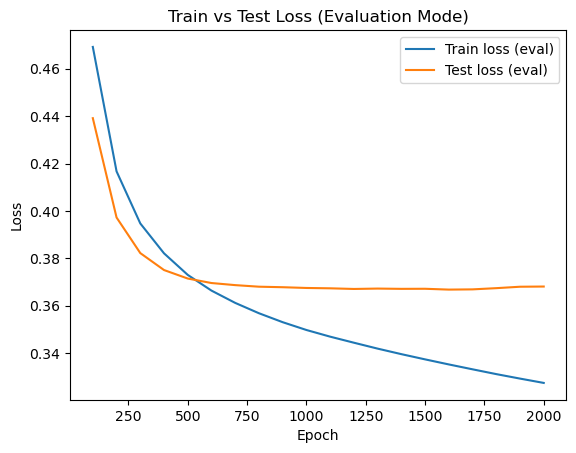

In [25]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df["epoch"], df["train_loss(eval)"], label="Train loss (eval)")
plt.plot(df["epoch"], df["test_loss(eval)"], label="Test loss (eval)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train vs Test Loss (Evaluation Mode)")
plt.legend()
plt.show()


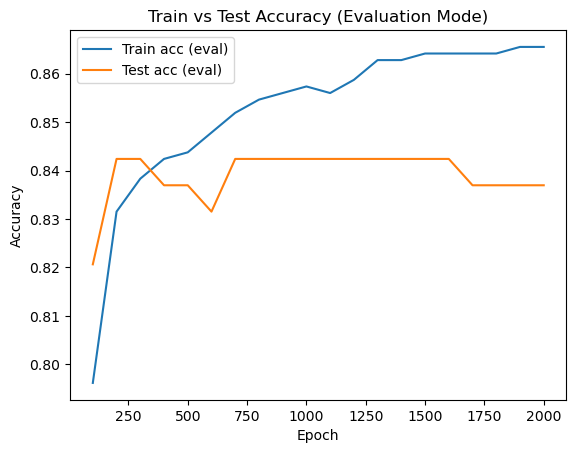

In [26]:
plt.figure()
plt.plot(df["epoch"], df["train_acc(eval)"], label="Train acc (eval)")
plt.plot(df["epoch"], df["test_acc(eval)"], label="Test acc (eval)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy (Evaluation Mode)")
plt.legend()
plt.show()


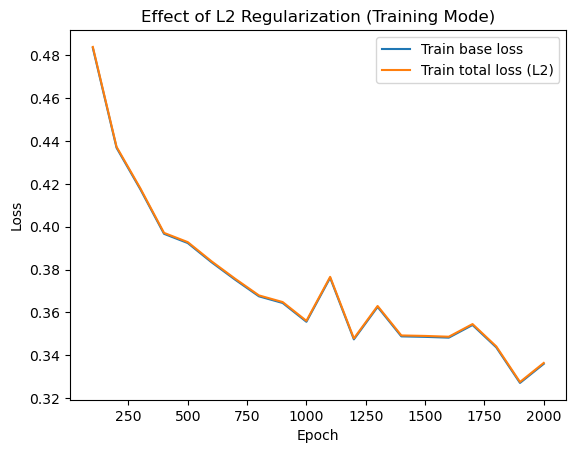

In [27]:
plt.figure()
plt.plot(df["epoch"], df["train_base_loss(train)"], label="Train base loss")
plt.plot(df["epoch"], df["train_total_loss(train)"], label="Train total loss (L2)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Effect of L2 Regularization (Training Mode)")
plt.legend()
plt.show()
